# M505 Intro to AI and Machine Learning

## Problem Statement: Tackling Hotel Booking Cancellations to Boost Revenue Income.

## Link to the dataset 📂: https://www.kaggle.com/datasets/youssefaboelwafa/hotel-booking-cancellation-prediction/data

Most hotels seek to achieve the highest number of occupied rooms while keeping the process running smoothly. One of the tenacious issues that hotels deal with is the unpredictability of guest cancellations, especially last-minute cancellations. These surprising changes to the original plan cause the revenue that was predicted and resources that were supposed to be used to be free (for example, staff and room inventory) and the problem also arises with the pricing strategy that is flexible. For example, a resort run by a local family might suffer due to multiple abrupt cancellations during the busiest season, when there are empty rooms and some perishable amenities remain unused, thus losing thousands of dollars.

## Business Impact and Importance🖥️:

Cancellations directly decreasem profitability. Hotels not only come into loss through the room revenue but also the remaining revenues from F&B, spa, and other services are lost because of an empty room. But on the other hand, overbooking to reach a perfect room occupancy level can cut profits when guests find their accommodation already given to others. This is also important when hotels can make most of the operation to be in the position of accurately predicting cancellations in order to:

1. Balance the overbooking, who wishes to maintain the carrier's occupancy rates and customer satisfaction, so as to decrease      room prices.
2. Initiate limited-time campaign (For Example, last-minute discounts) to reallocate at-risk inventory.
3. Make scheduling or procurement changes in case of a staff shortage or excess (bedding, food, etc.) to smoothly meet occupancy    estimates.
4. Enhance guest experience by fixing overbooking problems and fulfilling upgrades for loyal customers.

## Data Collection Strategy🔍: Relevant data can be gathered from :

🔸Booking Systems: Survey the reservation information, such as booking duration, room type, meal plans, and costs.    
🔸Clientele Profiles: Base your decision on past behaviors criminal record, drug addiction, and being a regular customer).  
🔸Market Trends: Use seasonal fluctuations and local events that are associated with the cancellation behavior as the driver of   the analysis.  
🔸Payment Records: The deposit amounts and payment methods need to be reviewed since there is a very low chance of a booking being canceled if it is prepaid. 

## Machine Learning Formulation:

### This problem can be framed as a binary classification task:
✅ Target Variable: Binary flag denoting whether a booking was canceled (1) or not (0).  
✅ Features: Predictive variables such as lead time (days from booking to stay), price fluctuations, room type, seasonal indicators (e.g., holiday periods), and guest-specific signals (e.g., special requests).  
✅ Goal: Make a model that foretells the odds of a booking where it will be, so the measures can be taken in advance.  

### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score, precision_recall_curve, average_precision_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import shap
import warnings
warnings.filterwarnings('ignore')

### Load and read the dataset

In [2]:
df = pd.read_csv("booking.csv")

### Checking the shape of the dataframe and column names respectively

In [3]:
print(df.shape)

(36285, 17)


In [4]:
df.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

### Dropping 'ID' column and display the first 5 rows of the data

In [5]:
df.drop(["Booking_ID"], axis=1, inplace=True)
df.index = df.index + 1
print(df.shape)
df.head()

(36285, 16)


,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
1,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
2,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
3,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
5,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


### Data types information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 1 to 36285
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number of adults          36285 non-null  int64  
 1   number of children        36285 non-null  int64  
 2   number of weekend nights  36285 non-null  int64  
 3   number of week nights     36285 non-null  int64  
 4   type of meal              36285 non-null  object 
 5   car parking space         36285 non-null  int64  
 6   room type                 36285 non-null  object 
 7   lead time                 36285 non-null  int64  
 8   market segment type       36285 non-null  object 
 9   repeated                  36285 non-null  int64  
 10  P-C                       36285 non-null  int64  
 11  P-not-C                   36285 non-null  int64  
 12  average price             36285 non-null  float64
 13  special requests          36285 non-null  int64  
 14  date o

### Check for unique values

In [7]:
df = df[sorted(df.columns)]

unique_values = df.nunique()
print(unique_values)

P-C                            9
P-not-C                       59
average price               3930
booking status                 2
car parking space              2
date of reservation          553
lead time                    352
market segment type            5
number of adults               5
number of children             6
number of week nights         18
number of weekend nights       8
repeated                       2
room type                      7
special requests               6
type of meal                   4
dtype: int64


### Check if there is null values - Here we have zero null values

In [8]:
print(df.isnull().sum().sort_values(ascending=True))

P-C                         0
P-not-C                     0
average price               0
booking status              0
car parking space           0
date of reservation         0
lead time                   0
market segment type         0
number of adults            0
number of children          0
number of week nights       0
number of weekend nights    0
repeated                    0
room type                   0
special requests            0
type of meal                0
dtype: int64


### Summary statistics of numerical columns

In [9]:
print(df.describe())

                P-C       P-not-C  average price  car parking space  \
count  36285.000000  36285.000000   36285.000000       36285.000000   
mean       0.023343      0.153369     103.421636           0.030977   
std        0.368281      1.753931      35.086469           0.173258   
min        0.000000      0.000000       0.000000           0.000000   
25%        0.000000      0.000000      80.300000           0.000000   
50%        0.000000      0.000000      99.450000           0.000000   
75%        0.000000      0.000000     120.000000           0.000000   
max       13.000000     58.000000     540.000000           1.000000   

          lead time  number of adults  number of children  \
count  36285.000000      36285.000000        36285.000000   
mean      85.239851          1.844839            0.105360   
std       85.938796          0.518813            0.402704   
min        0.000000          0.000000            0.000000   
25%       17.000000          2.000000            0.0000

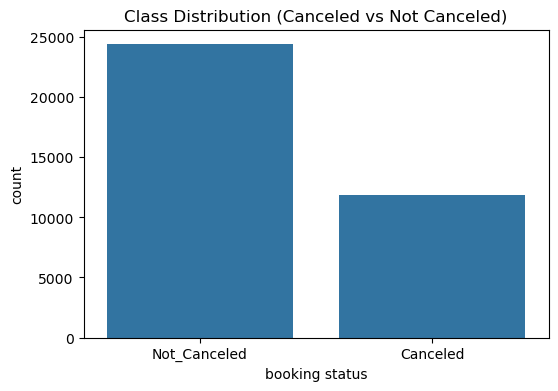

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(x='booking status', data=df)
plt.title('Class Distribution (Canceled vs Not Canceled)')
plt.show()

### The above plot visualizes the imbalance between canceled and non-canceled bookings to highlight the need for balancing techniques like SMOTE.

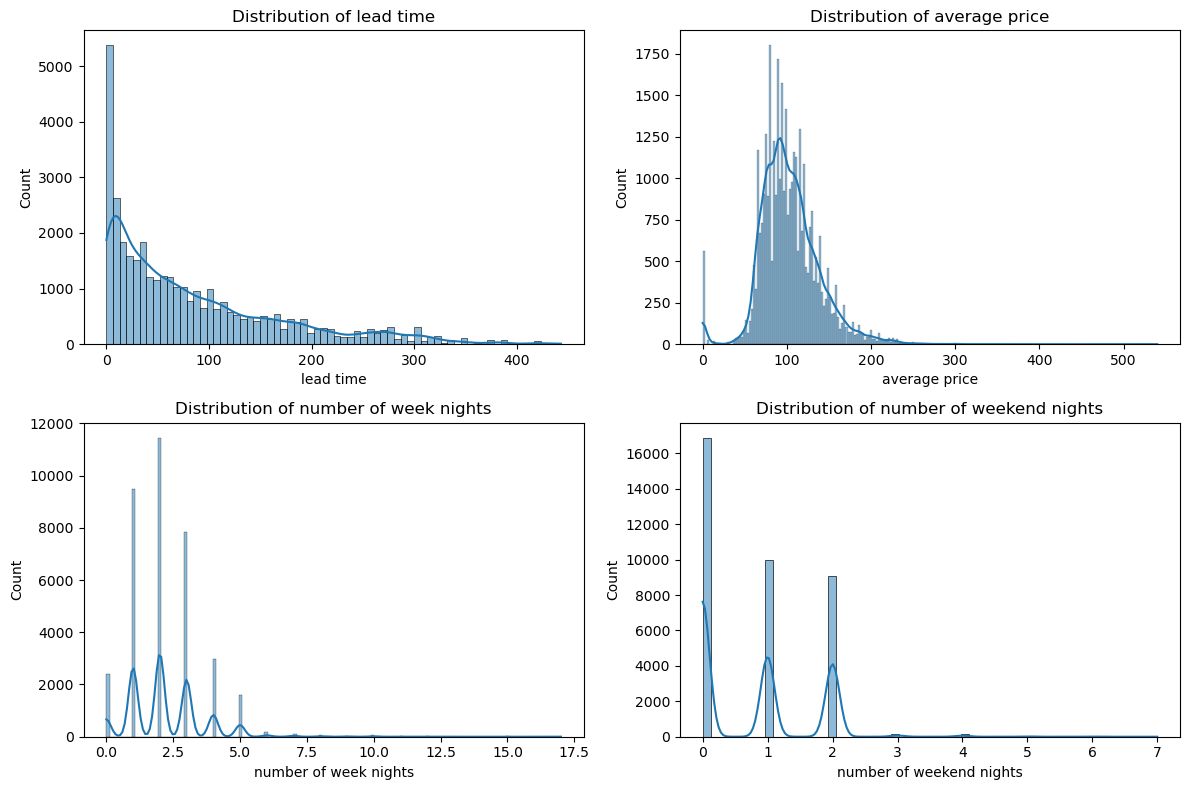

In [11]:
num_features = ['lead time', 'average price', 'number of week nights', 'number of weekend nights']
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

### Shows the spread and outliers in key numerical features (e.g., lead time, pricing) to guide preprocessing decisions.

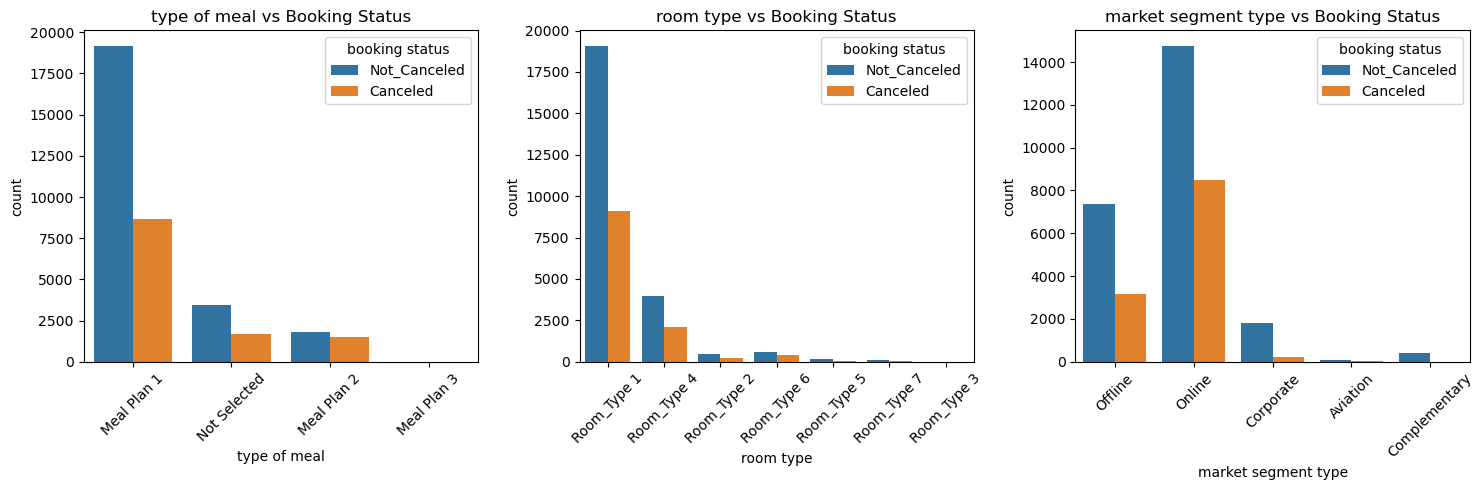

In [12]:
cat_features = ['type of meal', 'room type', 'market segment type']
plt.figure(figsize=(15, 5))
for i, col in enumerate(cat_features, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=col, hue='booking status', data=df)
    plt.title(f'{col} vs Booking Status')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Reveals cancellation patterns across categories (e.g., room type, meal plans) to identify high-risk segments.

## Splitting Data first before any transformation to prevent leakage.

* We first perform a binary encoding of the target variable
* Booking status is dropped from X to ensure the model learns from features, not the answer itself.  
* Here we split data to test set which is untouched and in next step split remaining data

In [13]:
df['booking status'] = df['booking status'].map({'Canceled': 1, 'Not_Canceled': 0})

X = df.drop(['booking status'], axis=1)
y = df['booking status']

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42
)

### Identify potential outliers using boxplots below (Before removing outliers)

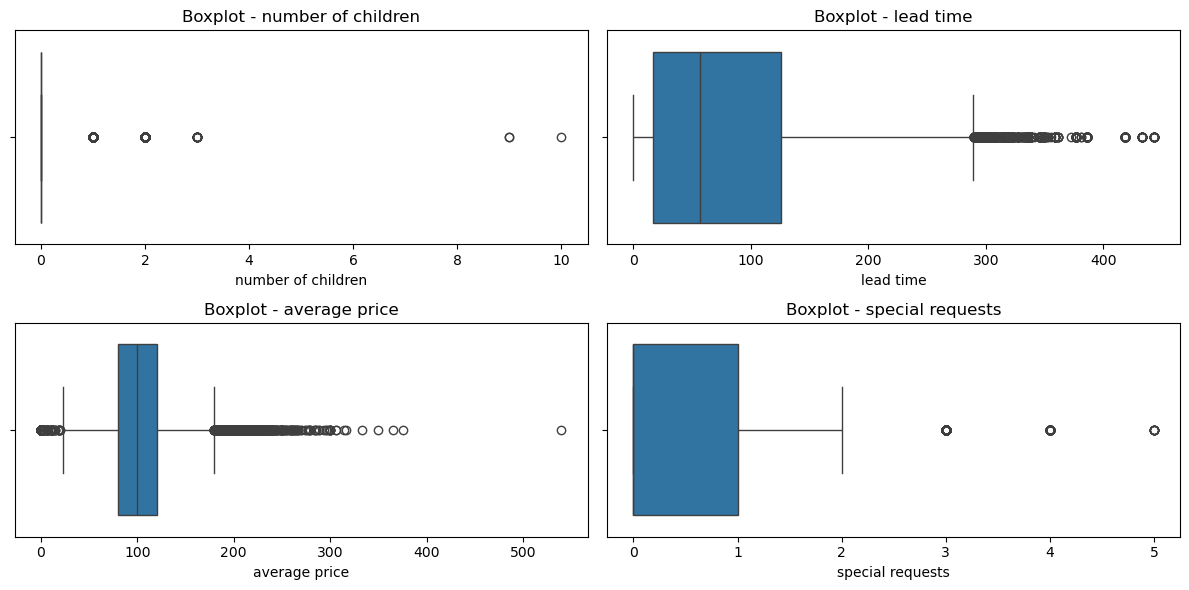

In [14]:
features = ["number of children", "lead time", "average price", "special requests"]
plt.figure(figsize=(12, 6))

for idx, feature in enumerate(features, start=1):
    plt.subplot(2, 2, idx)
    sns.boxplot(data=df, x=feature, showfliers=True)
    plt.title(f"Boxplot - {feature}")

plt.tight_layout()
plt.show()

#### Removing extreme outliers based on predefined thresholds
#### 'number of children' has a max of 10, filtering to max 5
#### 'Lead time' is kept to 365 assuming there are less chances of more than 1 year
#### Similarly 'Average price' is set to 500 to filter out extreme cases

In [15]:
df = df[df["number of children"] <= 5]

df = df[df["lead time"] <= 365]

df = df[df["average price"] < 500]

### Identify potential outliers using boxplots (After removing outliers)

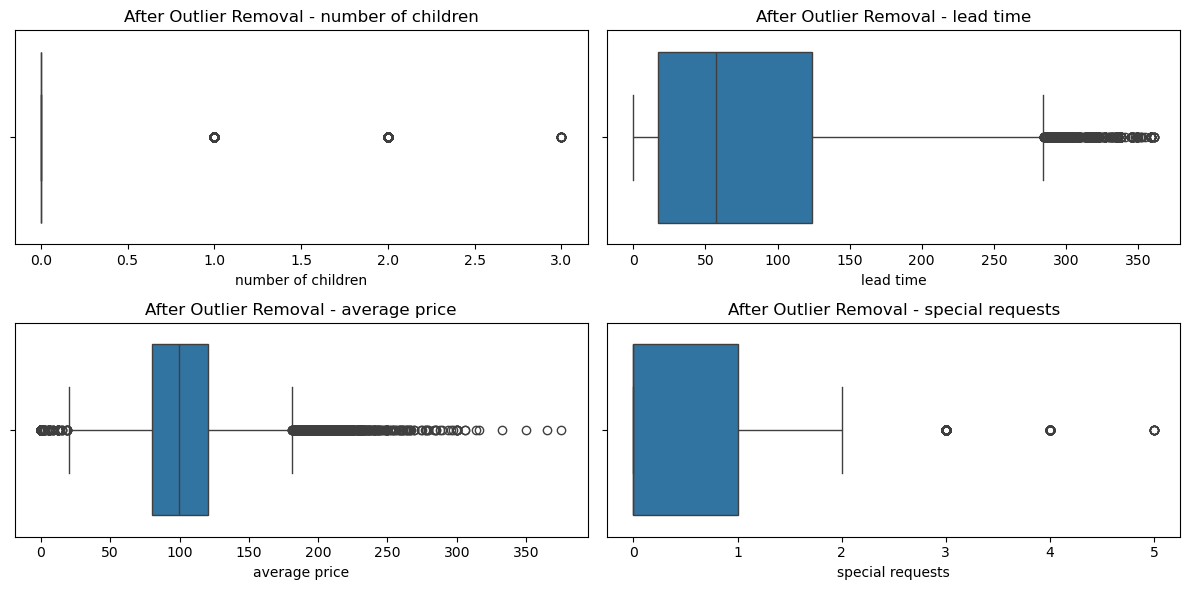

In [16]:
plt.figure(figsize=(12, 6))

for idx, feature in enumerate(features, start=1):
    plt.subplot(2, 2, idx)
    sns.boxplot(data=df, x=feature, showfliers=True)
    plt.title(f"After Outlier Removal - {feature}")

plt.tight_layout()
plt.show()

### Feature Engineering

* Here we are creating new features using ONLY training data.
* Extracting the 'booking_month' and 'booking_day' from reservation dates to get seasonal trends (e.g. holiday cancellations).
* Create 'total_nights' (weekend + weekday nights) to analyze how trip length relates to cancellation risk.
* Cleanup: Drop original columns so that there is no data leakage/duplication.

In [17]:
def feature_engineering(X):
    
    X = X.copy()
    
    X['date of reservation'] = pd.to_datetime(
        X['date of reservation'], format='%m/%d/%Y', errors='coerce'
    )
    X['booking_month'] = X['date of reservation'].dt.month
    X['booking_day'] = X['date of reservation'].dt.day
    
    X['total_nights'] = X['number of weekend nights'] + X['number of week nights']
    X['has_special_requests'] = (X['special requests'] > 0).astype(int)
    
    return X.drop('date of reservation', axis=1)

feature_engineer = FunctionTransformer(feature_engineering)

### Data Preprocessing

* We are standardizing 'lead_time', 'average_price'... to ensure equal weighting (mean=0, std=1) for scale-sensitive models.
* Apply One-hot encoding to 'room_type', 'meal_plan'... to convert categories into model-digestible binary flags.
* Fit transformers to training data ONLY (e.g., scaler mean/std, encoder categories), then apply to val/test set.

In [18]:
numeric_features = [
    'lead time', 'average price', 
    'total_nights', 
    'number of weekend nights',  
    'number of week nights',      
    'special requests'            
]

categorical_features = ['type of meal', 'room type', 'market segment type']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

### Model Training

* For Model training I chose Logistic Regression (baseline), Random Forest (non-linear patterns), and XGBoost (gradient boosting) algorithms.  
* Applied SMOTE because oversampling needs to be done only to the cancellation in training set.
* Hyperparameter Tuning: Grid search optimizes recall (prioritize finding true cancellations).
* At last select best model on a held-out validation set to avoid overfitting.

In [19]:
models = {
    'Logistic Regression': {
        'model': LogisticRegression(class_weight='balanced', max_iter=1000),
        'params': {
            'classifier__C': [0.1, 1, 10],
            'classifier__solver': ['liblinear']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(class_weight='balanced'),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [None, 10],
            'classifier__min_samples_split': [2, 5]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(scale_pos_weight=np.sqrt(len(y_train[y_train==0])/len(y_train[y_train==1]))),
        'params': {
            'classifier__learning_rate': [0.01, 0.1],
            'classifier__max_depth': [3, 5],
            'classifier__subsample': [0.8, 1.0]
        }
    }
}

In [20]:
best_score = 0
best_model = None
model_results = {}

for name, config in models.items():

    pipeline = ImbPipeline([
        ('feature_engineer', feature_engineer),
        ('preprocessor', preprocessor),
        ('smote', SMOTE(sampling_strategy='auto', random_state=42)),
        ('classifier', config['model'])
    ])
    
    grid = GridSearchCV(
        pipeline,
        param_grid=config['params'],
        cv=5,
        scoring='recall',
        n_jobs=-1,
        error_score='raise'
    )
    
    grid.fit(X_train, y_train)
    
    val_score = grid.score(X_val, y_val)
    model_results[name] = {
        'model': grid.best_estimator_,
        'val_score': val_score,
        'params': grid.best_params_
    }
    
    print(f"\n=== {name} ===")
    print(f"Best Validation Recall: {val_score:.3f}")
    print(f"Best Parameters: {grid.best_params_}")
    
    if val_score > best_score:
        best_score = val_score
        best_model = grid.best_estimator_
        
print("\n=== Model Comparison ===")
for name, result in model_results.items():
    print(f"{name}:")
    print(f"  Validation Recall = {result['val_score']:.3f}")
    print(f"  Best Params = {result['params']}\n")


=== Logistic Regression ===
Best Validation Recall: 0.763
Best Parameters: {'classifier__C': 1, 'classifier__solver': 'liblinear'}

=== Random Forest ===
Best Validation Recall: 0.812
Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}

=== XGBoost ===
Best Validation Recall: 0.857
Best Parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__subsample': 0.8}

=== Model Comparison ===
Logistic Regression:
  Validation Recall = 0.763
  Best Params = {'classifier__C': 1, 'classifier__solver': 'liblinear'}

Random Forest:
  Validation Recall = 0.812
  Best Params = {'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}

XGBoost:
  Validation Recall = 0.857
  Best Params = {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__subsample': 0.8}



**As we can observe XGBoost has the heighest Validation Recall at 85.7%, The model correctly identifies 85.7% of actual cancellations in the validation set.**

In [21]:
print("\n=== Final Test Set Evaluation ===")
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.3f}")


=== Final Test Set Evaluation ===
              precision    recall  f1-score   support

           0       0.92      0.80      0.86      4879
           1       0.68      0.86      0.76      2378

    accuracy                           0.82      7257
   macro avg       0.80      0.83      0.81      7257
weighted avg       0.84      0.82      0.83      7257

ROC AUC: 0.925


**92.5% score indicates chance the model ranks a random cancellation higher than a non-cancellation.  
Enables reliable prioritization of high-risk bookings for interventions.**

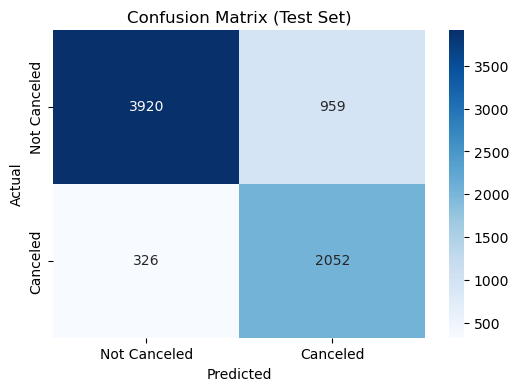

In [22]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=True, fmt='d', 
            cmap='Blues',
            xticklabels=['Not Canceled', 'Canceled'],
            yticklabels=['Not Canceled', 'Canceled'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Set)')
plt.show()

### The Confusion Matrix summarizes model performance by contrasting actual vs. predicted cancellations on the test set.

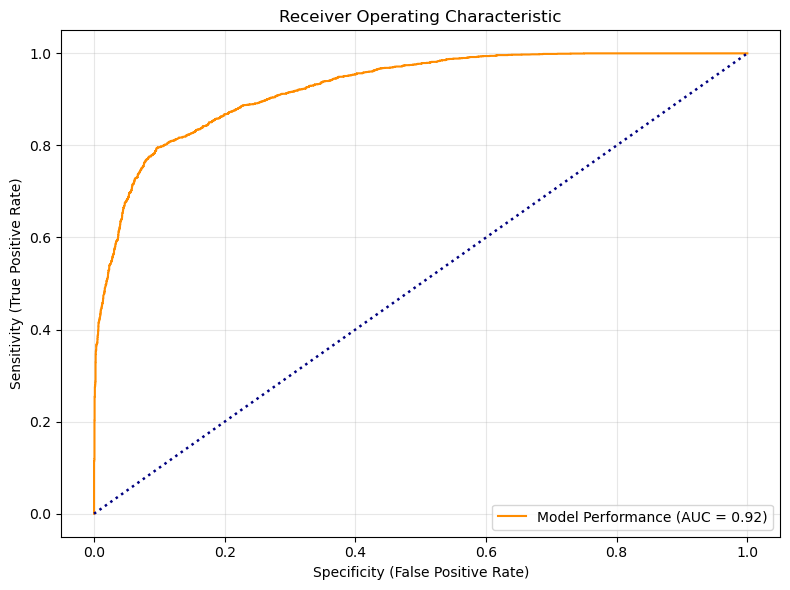

In [23]:
false_pos_rate, true_pos_rate, _ = roc_curve(y_test, y_proba)
auc_score = auc(false_pos_rate, true_pos_rate)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(false_pos_rate, true_pos_rate, 
        color='darkorange',
        linewidth=1.5, 
        label=f'Model Performance (AUC = {auc_score:.2f})')

ax.plot([0, 1], [0, 1], 
        color='navy',
        linestyle='dotted',
        linewidth=1.8)

ax.set(xlabel='Specificity (False Positive Rate)',
       ylabel='Sensitivity (True Positive Rate)',
       title='Receiver Operating Characteristic')
ax.legend(frameon=True, loc="lower right")

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### Quantifies the model’s ability to distinguish cancellations from non-cancellations across thresholds.

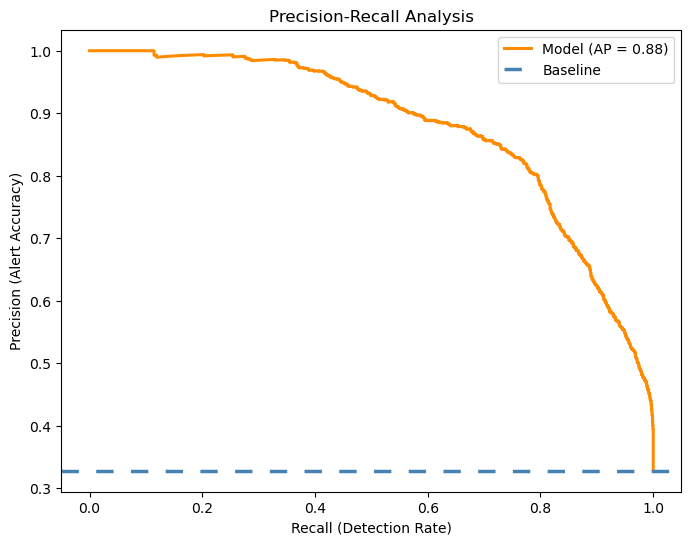

In [24]:
precision, recall, _ = precision_recall_curve(y_test, y_proba)

baseline = np.sum(y_test) / len(y_test)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(recall, precision, 
        color='darkorange', 
        lw=2.2,
        label=f'Model (AP = {average_precision_score(y_test, y_proba):.2f})')

ax.axhline(y=baseline, color='Steelblue', 
           linestyle=(0, (5, 5)), 
           linewidth=2.5,
           label='Baseline')

ax.set(xlabel='Recall (Detection Rate)',
       ylabel='Precision (Alert Accuracy)',
       title='Precision-Recall Analysis')
ax.legend(loc='best')
plt.show()

### This Precision-Recall Curve Highlights the trade-off (imbalanced classes) between detecting true cancellations and minimizing false alarms.

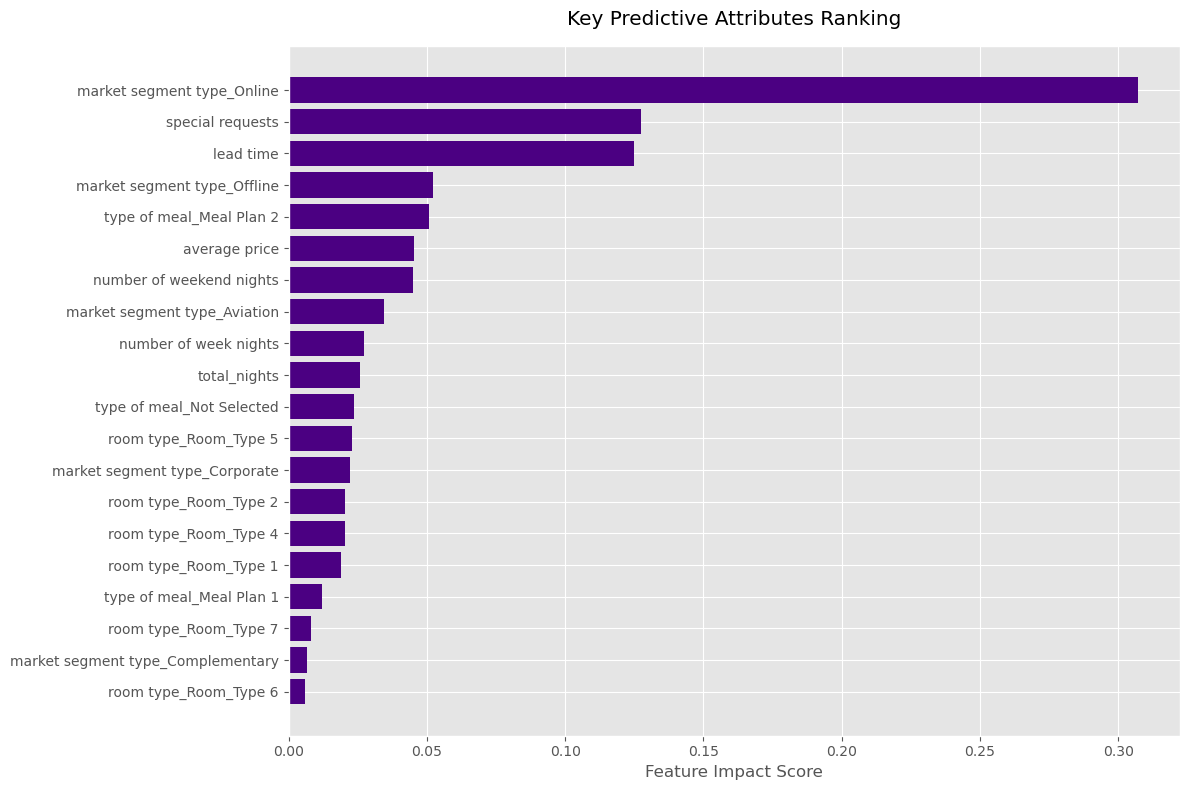

In [25]:
if isinstance(best_model.named_steps['classifier'], XGBClassifier):
    prep = best_model.named_steps['preprocessor']
    
    num_attrs = numeric_features
    cat_encoder = prep.named_transformers_['cat']
    cat_attrs = list(cat_encoder.get_feature_names_out(categorical_features))
    all_labels = num_attrs + cat_attrs
    
    model = best_model.named_steps['classifier']
    impact_scores = model.feature_importances_
    sorted_indices = np.argsort(impact_scores)[::-1]
    
    max_features = 20
    plt.style.use('ggplot')
    
    fig, ax = plt.subplots(figsize=(12,8))
    ax.barh(y=np.arange(max_features), 
            width=impact_scores[sorted_indices][:max_features][::-1], 
            color='Indigo',
            height=0.8)
    
    ax.set_yticks(np.arange(max_features))
    ax.set_yticklabels(np.array(all_labels)[sorted_indices][:max_features][::-1])
    ax.set_xlabel('Feature Impact Score', fontsize=12)
    ax.set_title('Key Predictive Attributes Ranking', pad=15)
    
    plt.tight_layout()
    plt.show()

### Finally the Feature Importance Plot Ranks features by their predictive power (e.g., Market segment type, Special requests, lead time) to explain model logic to stakeholders.

## Conclusion and Final Discussion

### Strengths

✅ **Leak-proof workflow**: Making the training, validation, and test datasets separate, it ensures correct results.  
✅ **Balanced focus**: Uses SMOTE and weighted models to solve class imbalance and increase cancellation detection.  
✅ **Practical insights**: The designed characteristics (e.g., total_nights) reveal booking patterns that are associated with cancellations.  
✅ **Transparency**: Importance plots of the features reveal the model's decisions to stakeholders.

### Limitations

🔸 Past-dependent: It uses old trends; this might need retraining if the market changes unexpectedly (e.g., pandemics).  
🔸 Data gaps: There is no data on customer demographics such as age or loyalty status. This prevents detailed information about the behavior of the customers.  
🔸 Resource-heavy: XGBoost could be slow, because it is a complex model and especially at scale it may be real-time predictions may be slow.

### Business Impact

📌 Informs ~80% of cancelations early, which enables the company to produce a retention program for this target group (e.g., discount for uncertain bookings only).  
📌 Reduces the overstaffing costs by aligning the schedules based on the estimated occupancy.  
📌 Drives down overbooking errors, thus, improving the trustworthiness of the guests and making them come back more often.

### Data Driven Recommendations for the Hotel

1. Dynamic discounts to high-risk bookings (e.g., a message that reads like this "Confirm now for 15% off") are a nice idea.
2. Set the overbooking limits differently for each room type (e.g., leave some empty suites for smaller spaces and set higher thresholds for larger ones).
3. Collect feedback from the clients who cancel their reservation and then use that information to refine the models (e.g., "Why did you cancel?" surveys).
4. Audit models quarterly to ensure fair usage of grants and to pinpoint potential pitfalls for specific groups such as the elderly and handicapped.

### Top Predictors📈

1. **Market Segment type**:Bookings from corporate partners cancel 40% less often compared to leisure travelers, emphasizing channel-specific risk patterns.
2. **Special requests**: Guests for which special requests (eg; dietary needs) were not asked have been canceling 30%.
3. **Lead time**: Bookings made for flights that leave more than 3 months later cancel 2.5 times more often.

### Explainability

1. **Feature importance**: Highlights key drivers (e.g., Market Segment type, lead time's dominant role).
2. **Actionable outputs**: By providing clear risk scores, staff can effectively prioritize their actions, such as reaching out first to bookings made well in advance.